In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow.keras.datasets import imdb

In [4]:
# IMDbデータセットの読み込み
(train_data, train_labels), (test_data, test_lebels) = imdb.load_data(num_words=10000)

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    # 形状が(len(sequential, dimension))の行列を作成し，０で埋める
    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # resluts[i]のインデックスを１に設定
        
    return results

# 訓練データのベクトル化
x_train = vectorize_sequences(train_data)

# テストデータのベクトル化
x_test = vectorize_sequences(test_data)

In [6]:
# ラベルのベクトル化
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asanyarray(test_lebels).astype('float32')

In [8]:
# モデルの定義
# キャパシティが小さいモデル
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 348us/sample - loss: 0.5842 - acc: 0.7279 - val_loss: 0.4901 - val_acc: 0.8445
Epoch 2/20
15000/15000 [==============================] - 2s 125us/sample - loss: 0.4125 - acc: 0.8845 - val_loss: 0.3848 - val_acc: 0.8807
Epoch 3/20
15000/15000 [==============================] - 2s 115us/sample - loss: 0.3164 - acc: 0.9133 - val_loss: 0.3306 - val_acc: 0.8871
Epoch 4/20
15000/15000 [==============================] - 2s 124us/sample - loss: 0.2548 - acc: 0.9285 - val_loss: 0.3066 - val_acc: 0.8854
Epoch 5/20
15000/15000 [==============================] - 2s 120us/sample - loss: 0.2140 - acc: 0.9371 - val_loss: 0.2836 - val_acc: 0.8895
Epoch 6/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.1820 - acc: 0.9485 - val_loss: 0.2781 - val_acc: 0.8902
Epoch 7/20
15000/15000 [==============================] - 2s 112us/sample - loss: 0.1584 - acc: 0.9547 - val_l

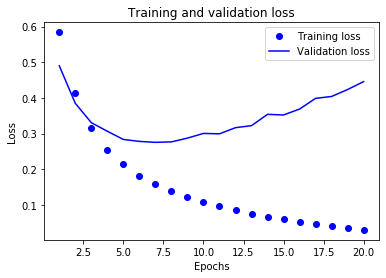

In [9]:
# 結果の確認

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [10]:
# モデルの定義
# キャパシティが大きいモデル
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 11s 747us/sample - loss: 0.5654 - acc: 0.7645 - val_loss: 0.3543 - val_acc: 0.8579
Epoch 2/20
15000/15000 [==============================] - 10s 638us/sample - loss: 0.2544 - acc: 0.8991 - val_loss: 0.2725 - val_acc: 0.8906
Epoch 3/20
15000/15000 [==============================] - 8s 553us/sample - loss: 0.1459 - acc: 0.9463 - val_loss: 0.3068 - val_acc: 0.8830
Epoch 4/20
15000/15000 [==============================] - 9s 629us/sample - loss: 0.0782 - acc: 0.9721 - val_loss: 0.3740 - val_acc: 0.8876
Epoch 5/20
15000/15000 [==============================] - 9s 615us/sample - loss: 0.1052 - acc: 0.9747 - val_loss: 0.3263 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 9s 587us/sample - loss: 0.0049 - acc: 0.9997 - val_loss: 0.5634 - val_acc: 0.8789
Epoch 7/20
15000/15000 [==============================] - 9s 584us/sample - loss: 6.9899e-04 - acc: 1.0000 -

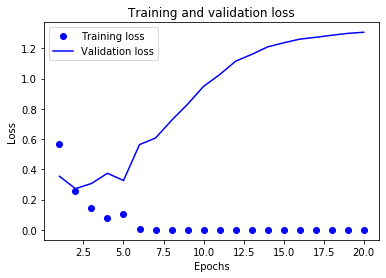

In [11]:
# 結果の確認
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [14]:
# モデルの定義
# 正則化項の追加
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 267us/sample - loss: 0.5844 - acc: 0.7793 - val_loss: 0.4613 - val_acc: 0.8589
Epoch 2/20
15000/15000 [==============================] - 2s 113us/sample - loss: 0.3841 - acc: 0.8965 - val_loss: 0.3757 - val_acc: 0.8779
Epoch 3/20
15000/15000 [==============================] - 2s 114us/sample - loss: 0.3083 - acc: 0.9137 - val_loss: 0.3383 - val_acc: 0.8899
Epoch 4/20
15000/15000 [==============================] - 2s 132us/sample - loss: 0.2691 - acc: 0.9273 - val_loss: 0.3282 - val_acc: 0.8904
Epoch 5/20
15000/15000 [==============================] - 2s 153us/sample - loss: 0.2422 - acc: 0.9371 - val_loss: 0.3284 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.2230 - acc: 0.9459 - val_loss: 0.3296 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 2s 132us/sample - loss: 0.2129 - acc: 0.9487 - val_l

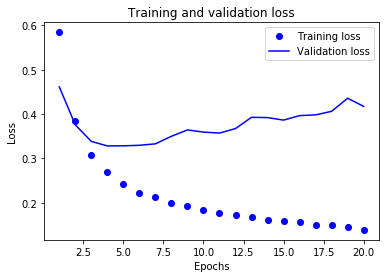

In [15]:
# 結果の確認
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
# モデルの定義
# 正則化項の追加
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 375us/sample - loss: 0.6408 - acc: 0.6389 - val_loss: 0.5263 - val_acc: 0.8398
Epoch 2/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.5147 - acc: 0.7655 - val_loss: 0.4186 - val_acc: 0.8697
Epoch 3/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.4300 - acc: 0.8302 - val_loss: 0.3705 - val_acc: 0.8752
Epoch 4/20
15000/15000 [==============================] - 2s 116us/sample - loss: 0.3755 - acc: 0.8666 - val_loss: 0.3254 - val_acc: 0.8823
Epoch 5/20
15000/15000 [==============================] - 2s 114us/sample - loss: 0.3277 - acc: 0.8950 - val_loss: 0.3038 - val_acc: 0.8836
Epoch 6/20
15000/15000 [==============================] - 2s 114us/sample - loss: 0.2938 - acc: 0.9107 - val_loss: 0.2941 - val_acc: 0.8883
Epoch 7/20
15000/15000 [==============================] - 2s 114us/sample - loss: 0.2627 - acc: 0.9221 - val_l

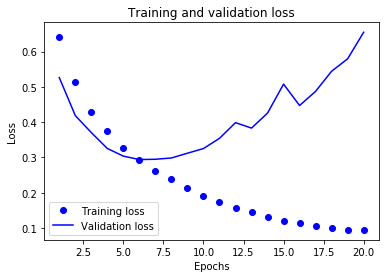

In [18]:
# 結果の確認
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()